# **Práctica 8 : Aplicando técnicas de validación cruzada**
En esta práctica aprenderemos y practicaremos las técnicas de validación cruzada. Técnicas que consisten en dividir el set de datos de entrenamiento en diferentes sets de entrenamiento y validación que se repite varias veces (pliegues o folds). Gracias a este método evitamos que el modelo "memorice", o sea, tenga sesgo de los datos evitando así el sobreajuste del modelo.

## **1. Importación de los datos a través de Google Colab**

In [1]:
from google.colab import drive
# Montamos el drive para traernos "data.csv" al cuadernillo
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
# Cargamos "data.csv" como un dataframe para trabajar mas comodamente
rutaArchivo = ("/content/drive/My Drive/" + r"TS - Machine Learning\M3_Interpretacion_Mejora_Modelos\3.1. Validación Cruzada\data.csv").replace("\\", "/")
# Cambio las contrabarras por barras normales para que se lea bien la ruta del archivo
# Marco la cadena como raw para que python no ineterprete "\*" como un caracter especial

df = pd.read_csv(rutaArchivo)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **2. Análisis de las estadísticas básicas y verificación de las estructura de datos**
Antes de meternos en faena con la validación cruzada y el desarrollo de nuestros modelos de aprendizaje automático, realizaremos un análisis de las estadísticas básicas de nuestros datos, así como la verificación de la estructura de los mismos para poder trabajar más cómodamente.

### **Verificación de la estructura de los datos**
En esta sección trataremos la estructura de los datos, como el número de filas y columnas, el tipo de datos que tenemos, la codificación de los mismos, valores duplicados, valores nulos, etc.


In [3]:
# Empezamos mirando la forma que tienen nuestros datos
print("Nº filas: " + str(df.shape[0]))
print("Nº columnas: " + str(df.shape[1]))

Nº filas: 569
Nº columnas: 33


Vemos que tiene 569 filas por 33 columas, así que no nos encontramos frente a un dataset muy grande en cuanto a las filas se refiere. Por tanto aquí gana valor la validación cruzada.

In [4]:
# Veamos ahora el tipo de dato de cada columna
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Vemos que todas las columnas a expepción de "id" (int) y de "diagnosis" (object) que sospecho que será nuestro target o columna a predecir, son columnas de números flotantes en base 64.

In [5]:
# Hacemos un conteo de los valores nulos de todas las columnas para ver si podemos despreciar alguna o si alguna no va a ser relevante
print(df.isnull().any())
# El método .any() devualve True si existe algún valor nulo en la columna

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
# Sólamente la columna Unamed: 32 tiene valores nulos, vemos qué porcentaje representan los nulos
nulos_unamed = df['Unnamed: 32'].isnull().count()
porcentaje_nulos = df.shape[0] / nulos_unamed * 100

print("Porcentaje de nulos columna 'Unamed: 32': " + str(porcentaje_nulos) + "%")

Porcentaje de nulos columna 'Unamed: 32': 100.0%


Vemos que toda la columna completa de 'Unamed: 32' son valores nulos, así que voy a optar por eliminar esta columna ya que no va a tener ninguna relevancia en nuestro modelo. Aprovechamos también para despreciar la columna ID porque no tiene ninguna relevancia a la hora de entrenar un modelo.

In [7]:
# Eliminamos la columna del DataFrame
df = df.drop({'id', 'Unnamed: 32'}, axis= 1)
# Con el atributo axis = 1 le decimos que el valor es una columna
# Verificamos que efectivamente la ha borrado
print("Nº de columnas: " + str(df.shape[1]))
df.head()

Nº de columnas: 31


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Vemos qué valores toma la columna de 'diagnosis' para verificar que solo toma dos valores y en qué proporción está cada valor
print("Valores que toma la columna target y conteo: ")
print(df['diagnosis'].value_counts())

print("\nProporción de 'B':")
print(df['diagnosis'].value_counts()['B'] / df.shape[0])

print("\nProporción de 'M':")
print(df['diagnosis'].value_counts()['M'] / df.shape[0])

Valores que toma la columna target y conteo: 
diagnosis
B    357
M    212
Name: count, dtype: int64

Proporción de 'B':
0.6274165202108963

Proporción de 'M':
0.37258347978910367


Notamos que de los dos valores de la columna target están desbalanceados, las veces que aparece que un tumor es benigno son del 63% mientras que las veces que aparece un tumor maligno son del 37%. Esto no es un desbalanceo extremo pero podría significar que el accuracy pudiera ser una métrica engañosa ya que un modelo que siempre predijese benigno acertaría el 63% de las veces, necesitaremos métricas como la precisión, el recall y la F1-score.

También vamos a codificar de manera distinta la columna target ya que nos interesa de cara al rendimiento que esté codificado como un número entero:
- Benigno: "0"
- Maligno: "1"

In [9]:
# Recodificamos la columna 'diagnosis' sobre ella misma
df['diagnosis'] = df['diagnosis'].map({"M": 1, "B": 0})

# Comprobamos que lo ha hecho bien
print("Tipo de dato:")
print(df['diagnosis'].dtype)

df['diagnosis'].value_counts()

Tipo de dato:
int64


,count
diagnosis,
0,357
1,212


Pasamos ahora a ver una parte muy importante de cualquier set de datos, el número de valores duplicados que tiene.

In [10]:
# Vemos el número de valores duplicados con los métodos .duplicated() y .sum()

print("Nº de valores duplicados en el DataFrame: ")
print(df.duplicated().sum())

Nº de valores duplicados en el DataFrame: 
0


Que el DataFrame no tenga valores duplicados es una gran señal de la calidad de los datos con los que estamos trabajando.

### **Análisis de las estadísticas básicas**
Aquí nos dedicaremos a sacar estadísticas básicas de los datos: medidas de tendencia central (media, mediana y moda), medidas de dispersión (desviación estándar, varianza, mínimos-máximos y rango de valores), los percentiles, histogramas, correlación entre variables y una comparación de variables con el target.

In [11]:
# Para sacar el grueso de todas estas mediciones usaremos el método df.describe()

df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### **Análisis gráfico exploratorio**
Haremos ahora un análisis gráfico exploratorio para ver si tenemos valores outliers con boxplots e histogramas.

In [12]:
# Importamos la libreria matplotlib
import matplotlib.pyplot as plt

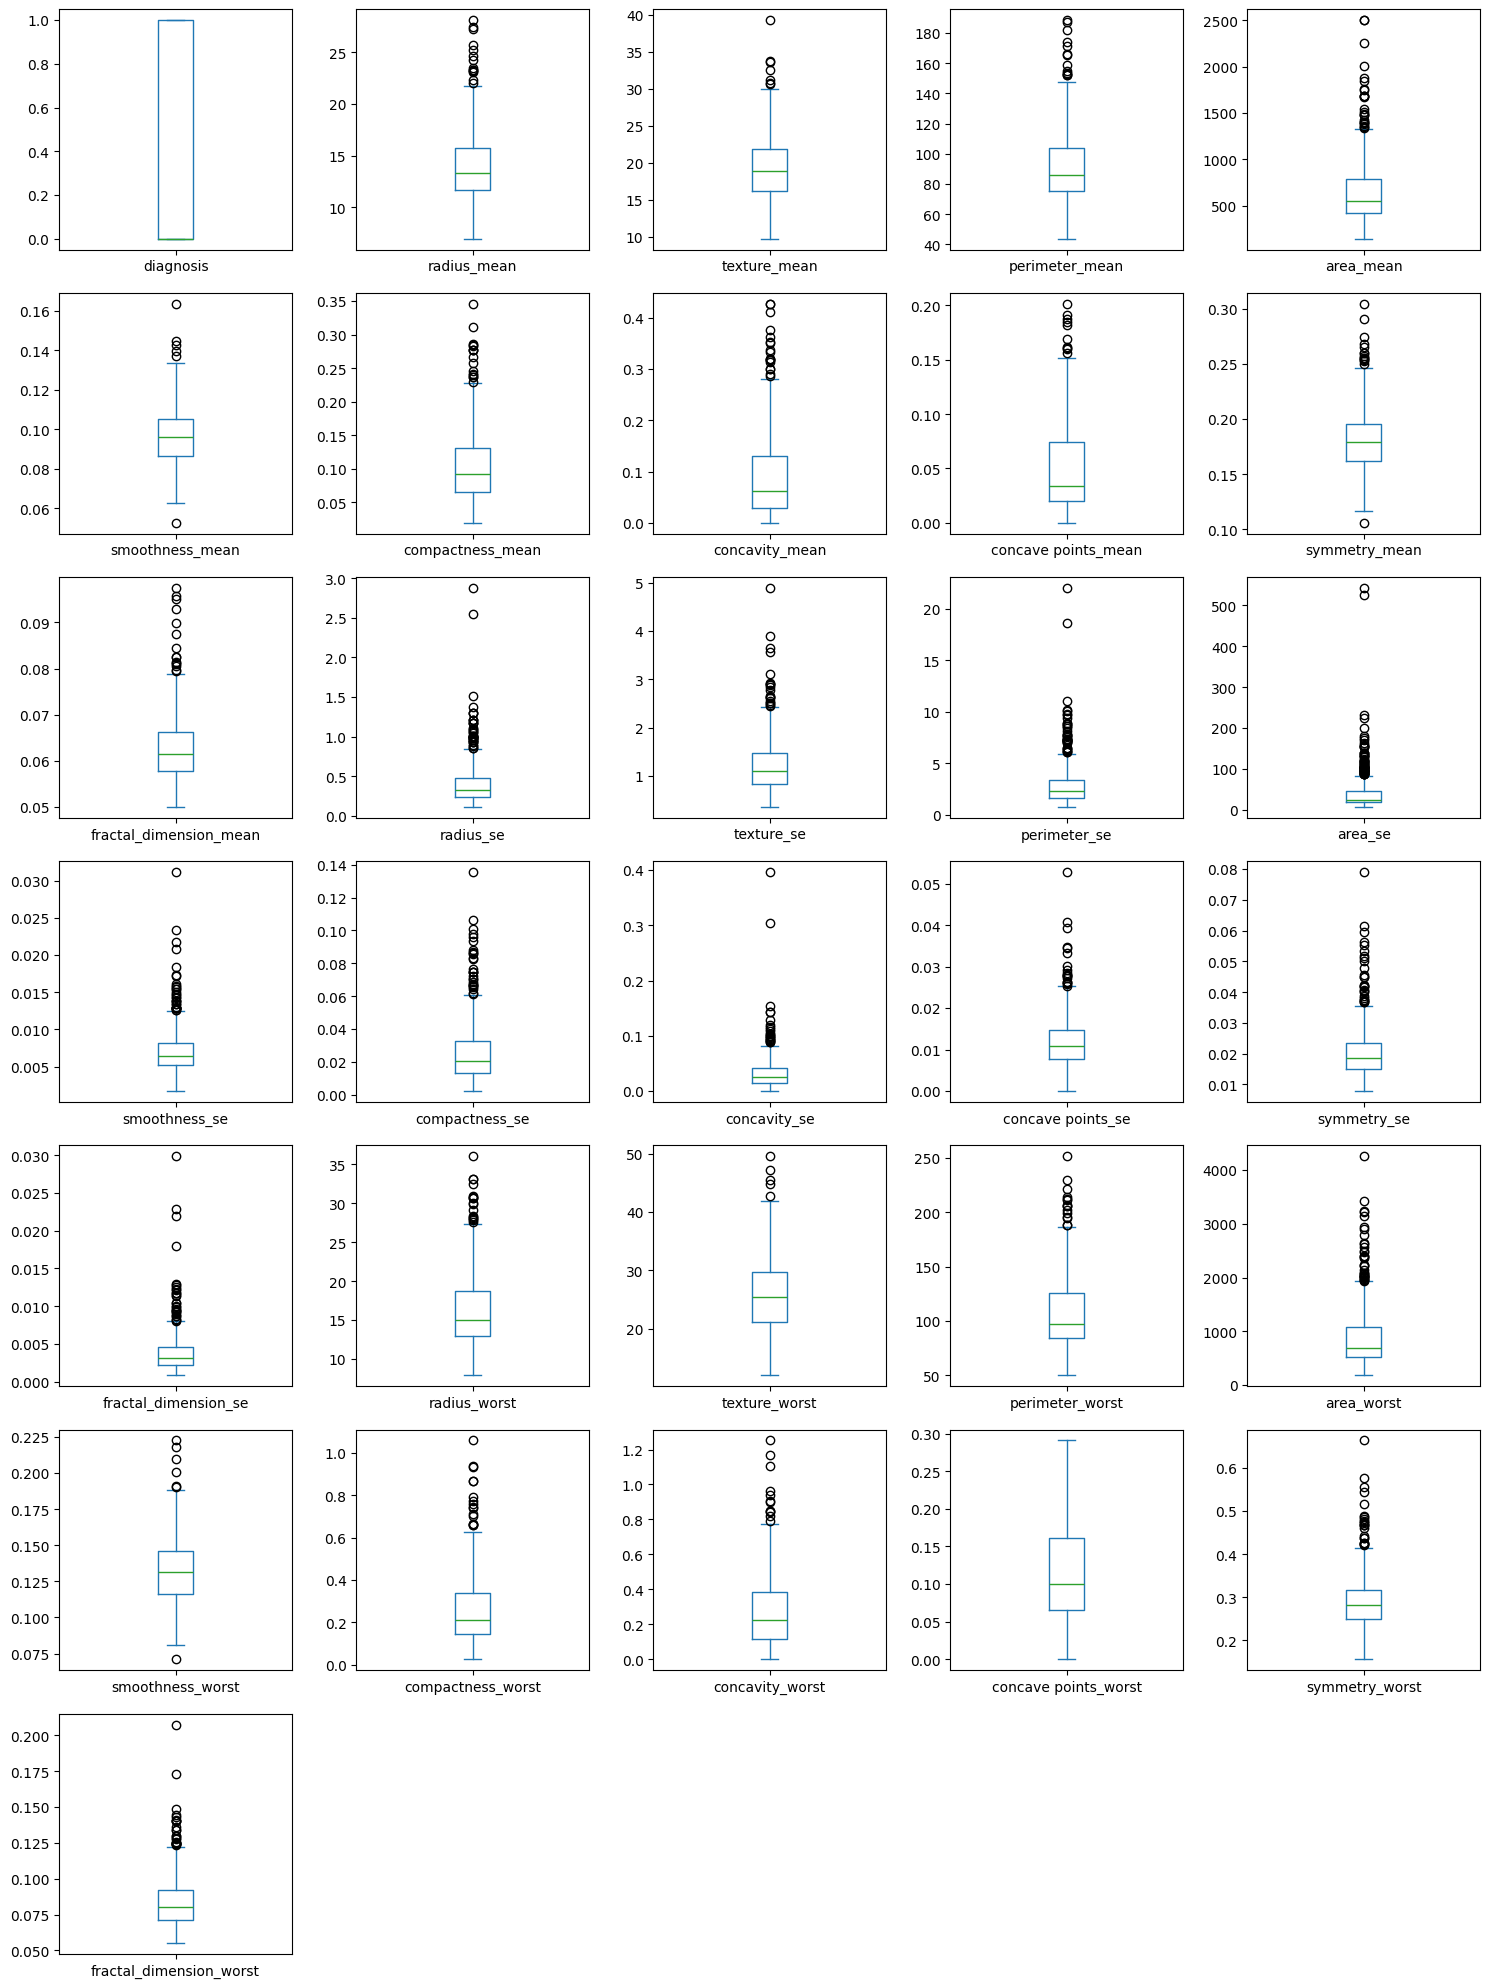

In [13]:
# Boxplots de todas las variables

df.plot(
    kind="box",
    layout= (7, 5),
    figsize= (15,20),
    subplots=True,
    sharex=False,
    sharey=False
)
plt.tight_layout()
plt.title("Boxplot Variables")
plt.show()

Con los boxplots podemos ver la cantidad de valores atípicos que tenemos en nuestros datos en columnas concretas como 'smoothness_worst' o 'fractal_dimension_se'.

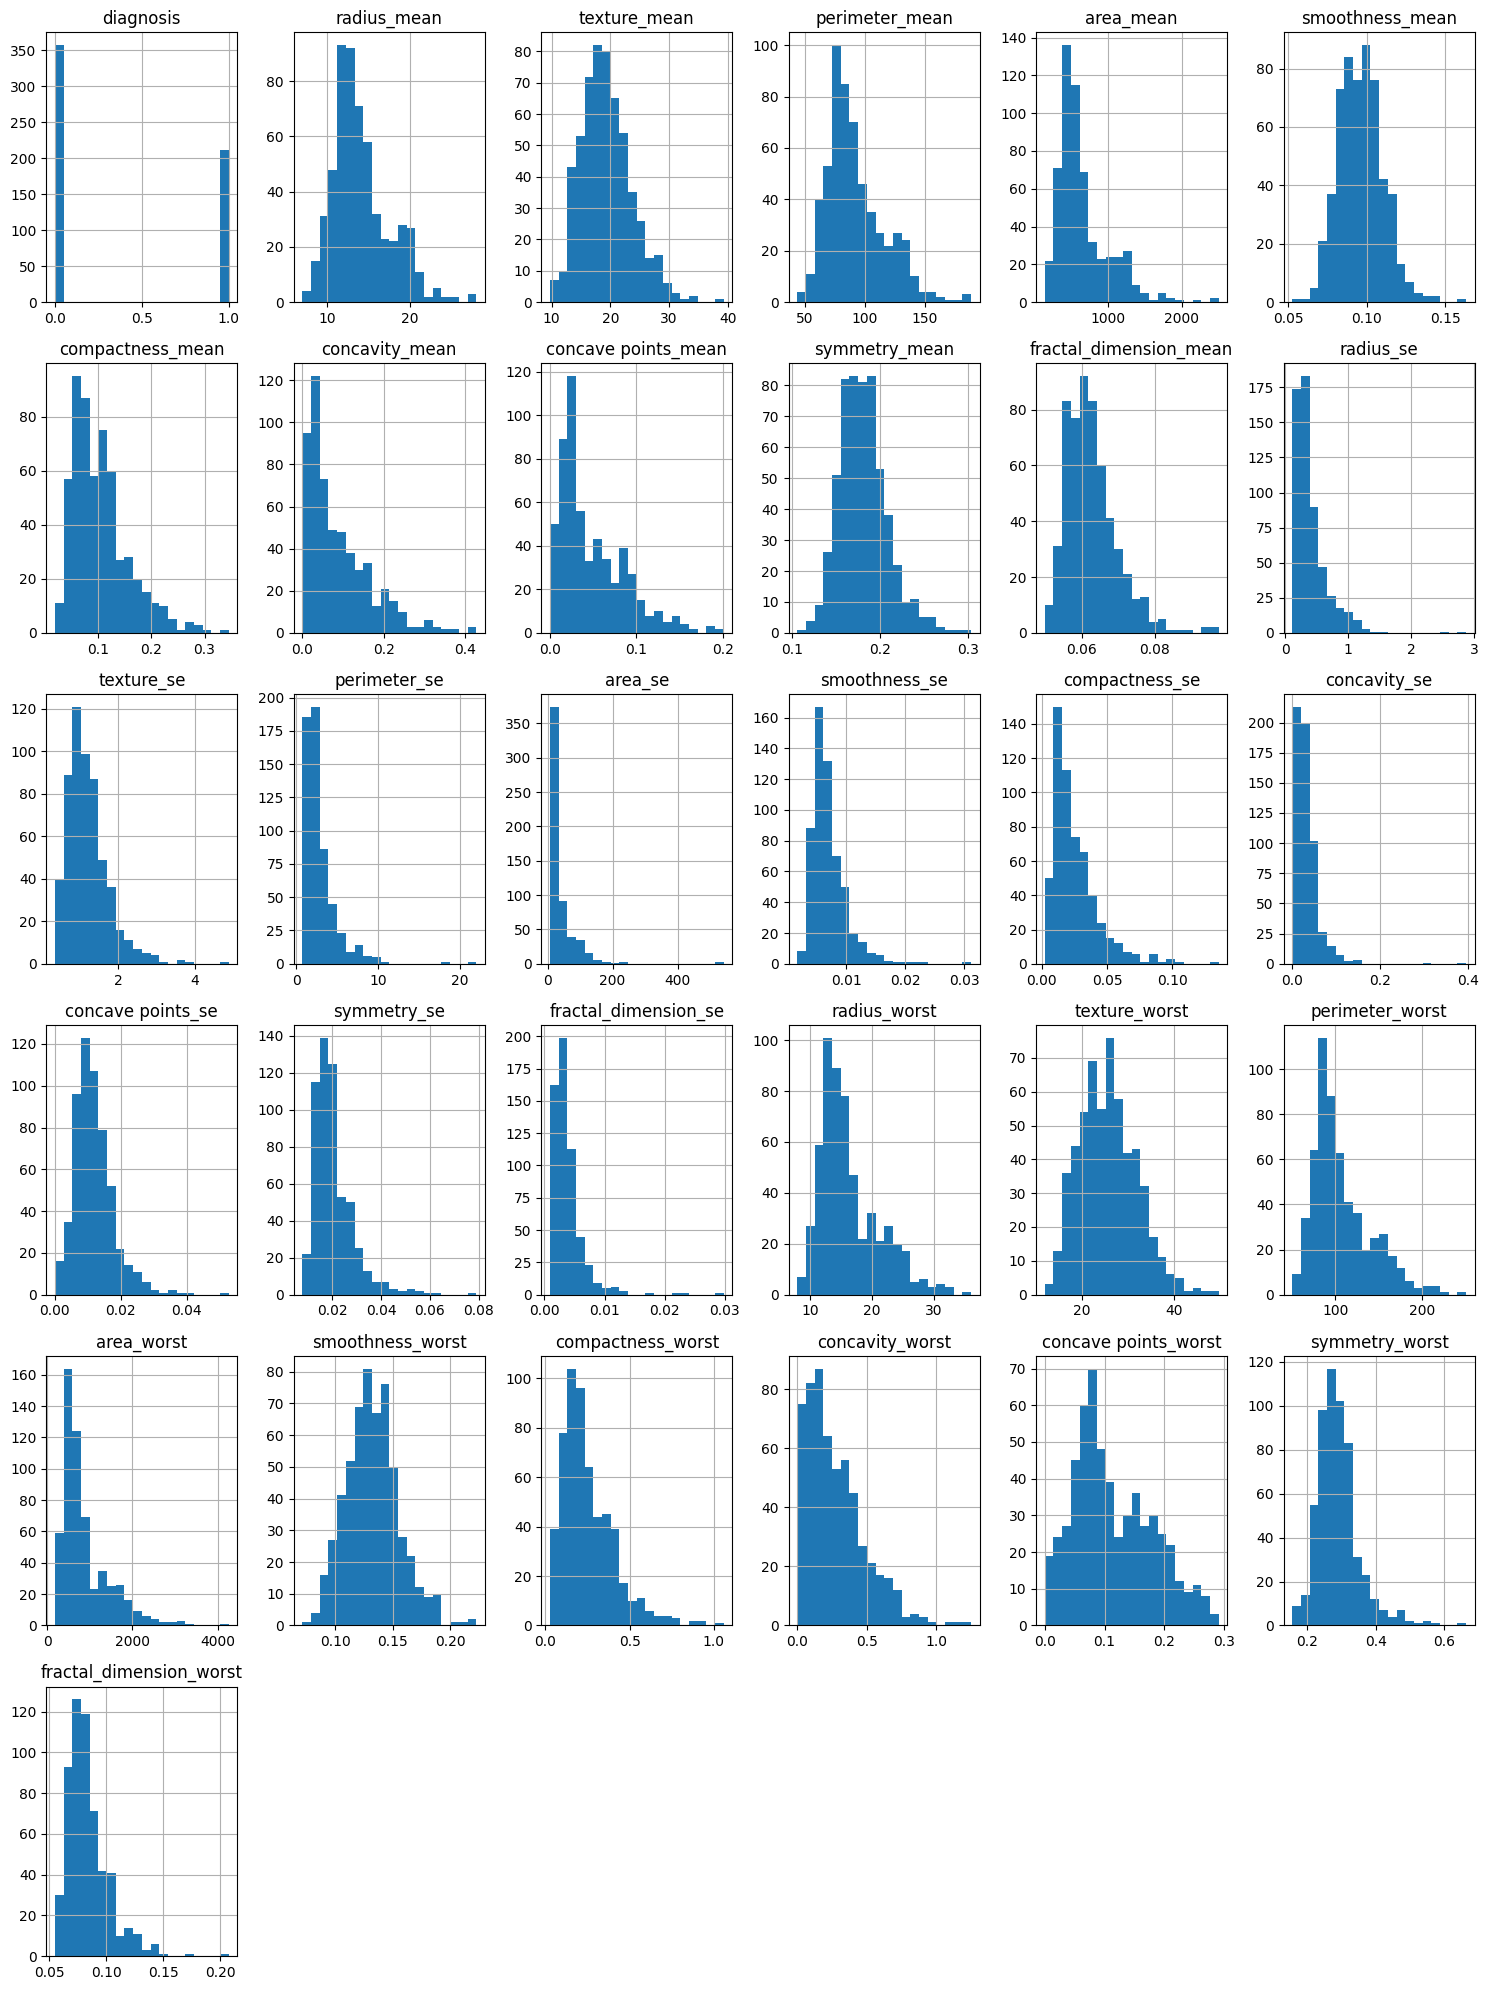

In [14]:
# Histograma de todas las variables

df.hist(figsize=(15,20), bins=20)
plt.tight_layout()
plt.show()

Gracias a los histogramas podemos ver claramente las distribuciones que toman las variables de nuestros datos. En general las variables presentan distribuciones normales(campana de Gauss), pero la otra gran malloria como 'fractal_dimension_worst' presentan un sesgo hacia la derecha con pocos valores altos(requeriría transformación en los datos como logaritmica, para estabilizar distribución).

También aquí se ve claro el desbalanceo que ya hemos comentado de la variable target 'diagnosis'.

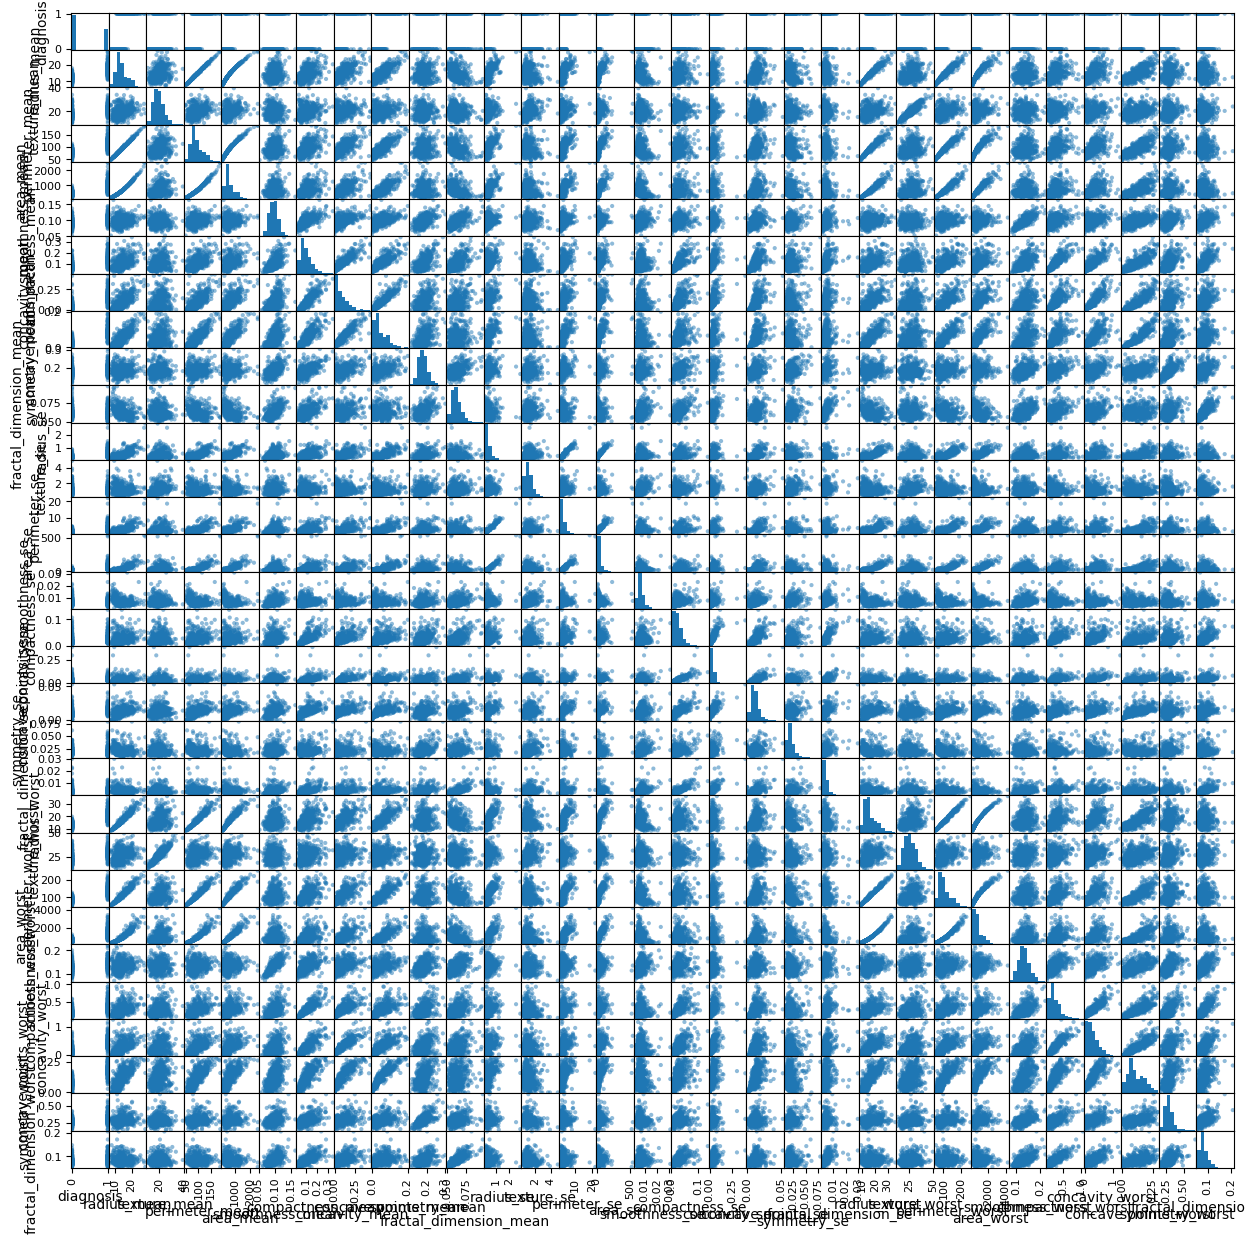

In [15]:
# Scatter matrix de variables
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15,15))
plt.show()

Gracias a la matriz de disperión podemos visualizar relaciones entre pares de clases y la distribución de cada una de ellas. Aunque es dificil de ver porque hay muchas clases en estos datos, se pueden apreciar correlaciones entre clases (las que forman una línea recta o se aproximan), y la naturaleza categórica de la variable target.

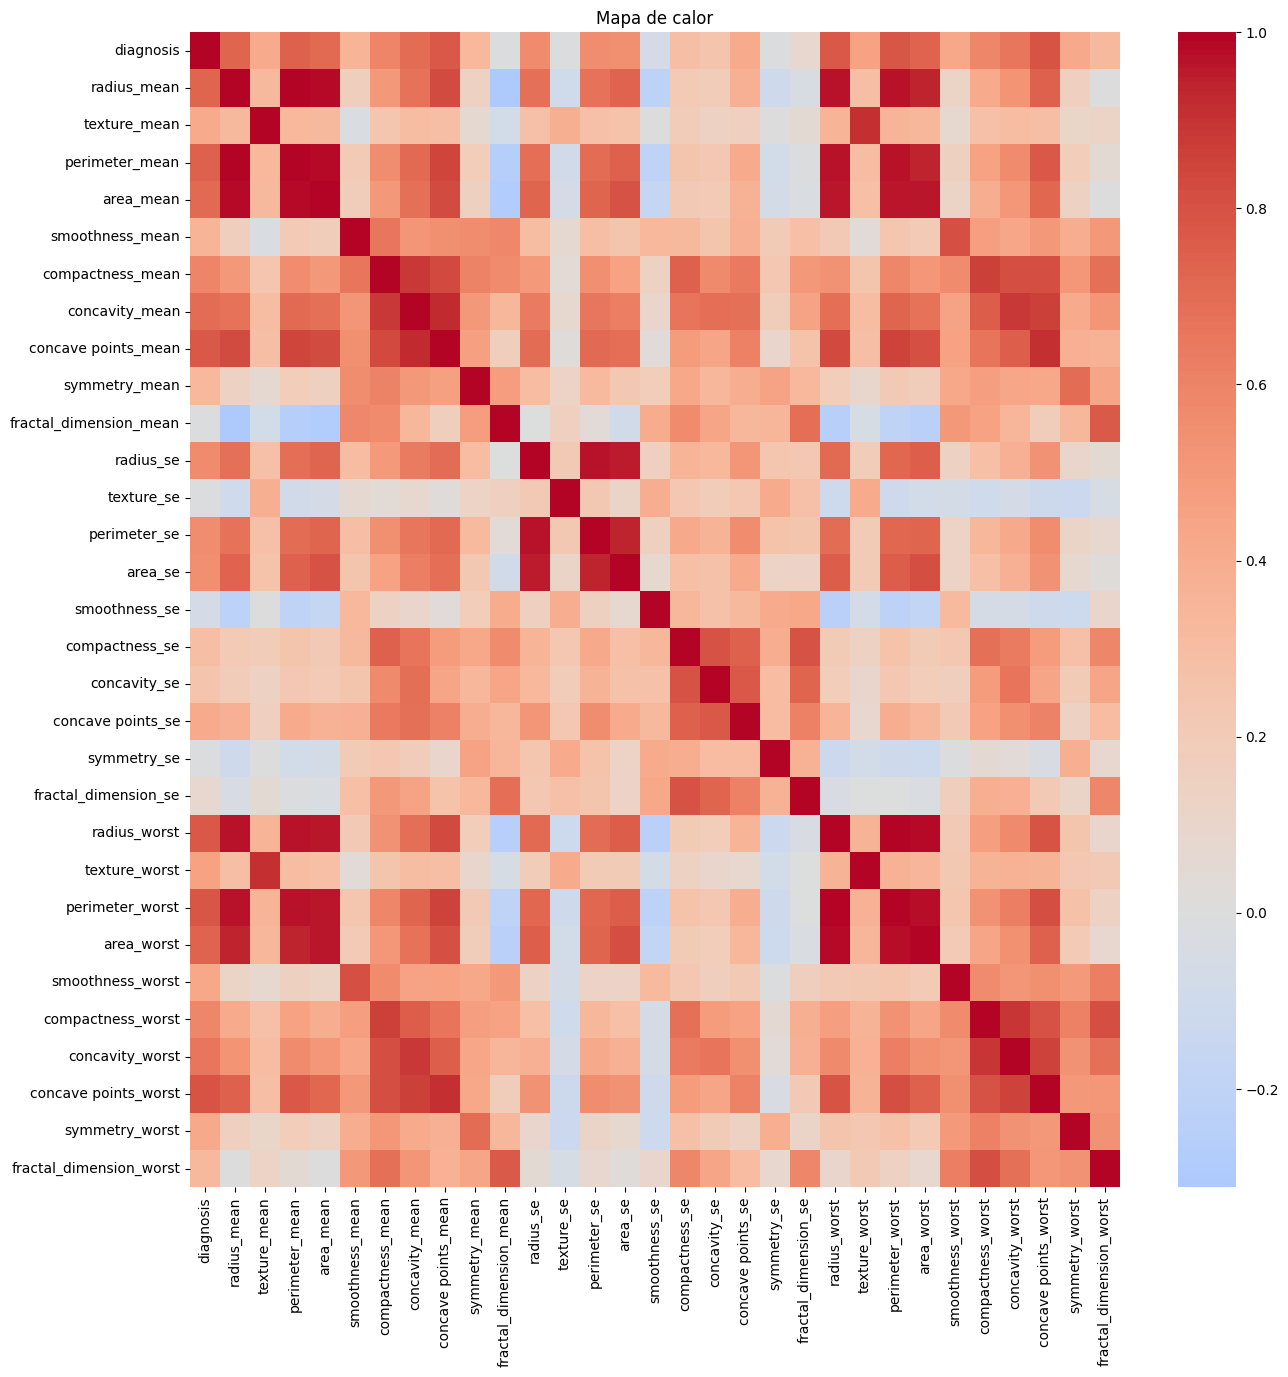

In [16]:
# Ahora realizaremos un mapa de calor para ver la correlacion de las variables con la variable target
import seaborn as sns # importamos libreria para heatmap

corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=False, cmap="coolwarm", center= 0)
plt.title("Mapa de calor")
plt.show()

Gracias al mapa de calor podemos identificar la correlacion de la variable target con el resto de variables. Cuanto más cálido es el color más se acerca la correlacion a 1 (correlacion positiva fuerte), y cuanto más frío es el color más se acerca la correlación a -1 (correlación negativa fuerte).
Tras un vistazo rápido podemos notar que no hay ninguna correlación negativa significativa, sin embargo variables como: 'perimeter_worst', 'radius_worst' o 'perimeter_mean' tienen una correlación positiva notable.

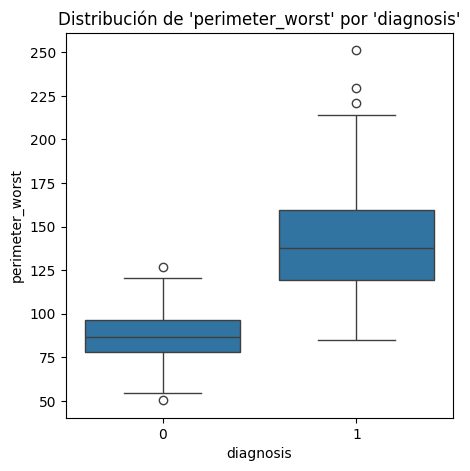

In [17]:
# Finalmente haremos una comparativa de algunas de las variables más correladas con la target

plt.figure(figsize=(5,5))
sns.boxplot(x='diagnosis', y='perimeter_worst', data=df)
plt.title("Distribución de 'perimeter_worst' por 'diagnosis'")
plt.show()

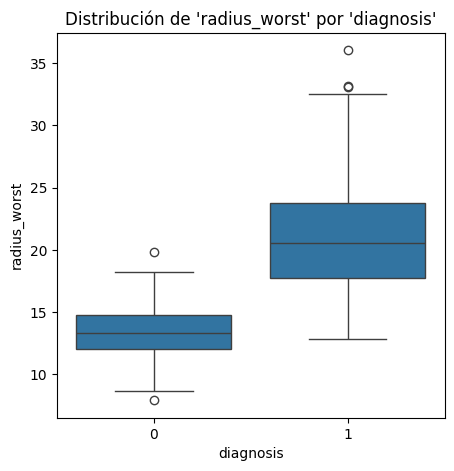

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x='diagnosis', y='radius_worst', data=df)
plt.title("Distribución de 'radius_worst' por 'diagnosis'")
plt.show()

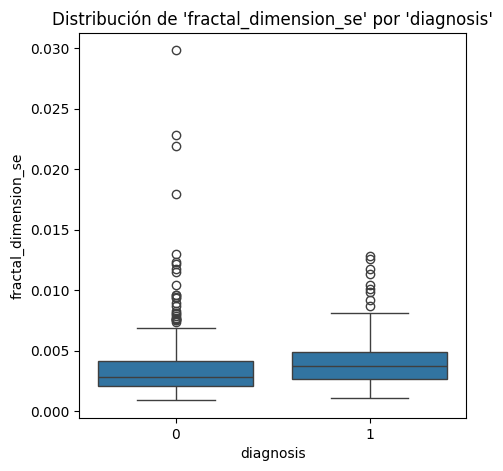

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(x='diagnosis', y='fractal_dimension_se', data=df)
plt.title("Distribución de 'fractal_dimension_se' por 'diagnosis'")
plt.show()

Como podemos apreciar en las gráficas, las dos primeras (variables con correlación) las cajas tanto de los tumores benignos como de los malignos están más o menos centradas y sin apenas outliers, mientras que en la última gráfica (variable no correlada con 'diagnosis') las cajas están menos centradas y con una cantidad significativa de valores atípicos.



## **3. Separación de los datos en entrenamiento y prueba**

In [20]:
from sklearn.model_selection import train_test_split # importamos el módulo de sklearn para la separacion

# Separamos la variable target en un dataframe a parte y la quitamos del principal
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Separamos en train y test con estratificación
# utilizamos la estratificación para que el desbalanceo que tenemos en la variable target se mantenga en la separación y evitemos sesgo en el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaño de train: " + str(X_train.shape[0]))
print("Tamaño de test: " + str(X_test.shape[0]))

Tamaño de train: 455
Tamaño de test: 114


## **4. Decision Tree con CV**

### **Entrenamiento y evaluación del modelo**
  Ahora entrenaremos el modelo de Árboles de Decisión haciendo uso de la validación cruzada K-Fold con K = (5,10). Luego evaluaremos su capacidad de generalización con el set de datos de test.

  Aunque en el ejercicio se nos dice que hemos de aplicar k = 5 y k = 10, he visto que normalmente k=5 se usa cuando queremos un modelo más rápido de entrenar pero menos estable (cuando hay muchos datos, etc.) y k=10 se usa cuando queremos un modelo más lento de entrenar pero más preciso al estimar el rendimiento real del mismo. Veremos si esto es así.

In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Función para representar la matriz de confusión de una manera más visual
def matriz_confusion(y_test, y_pred):
  plt.figure(figsize=(5,5))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Benigno', 'Maligno'],
              yticklabels=['Benigno', 'Maligno'])
  plt.title('Matriz de confusion')
  plt.xlabel('Predicción')
  plt.ylabel('Valor real')
  plt.show()

# Función para imprimir un resumen de las métricas de un modelo
def metricas(y_test, y_pred):
  print("\nEvaluación en el conjunto de test:")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
  print(f"F1-Score final: {f1_score(y_test, y_pred):.4f}")
  print("")
  matriz_confusion(y_test, y_pred)
  print("\nReporte de clasificación:")
  print(classification_report(y_test, y_pred))

Resultados de validación cruzada:
Accuracy medio con k=5: 0.9231 +/- 0.0326
Accuracy medio con k=10: 0.9166 +/- 0.0389
F1-Score medio con k=5: 0.8962 +/- 0.0447
F1-Score medio con k=10: 0.8866 +/- 0.0571

Evaluación en el conjunto de test:
Accuracy: 0.9298
F1-Score final: 0.9048



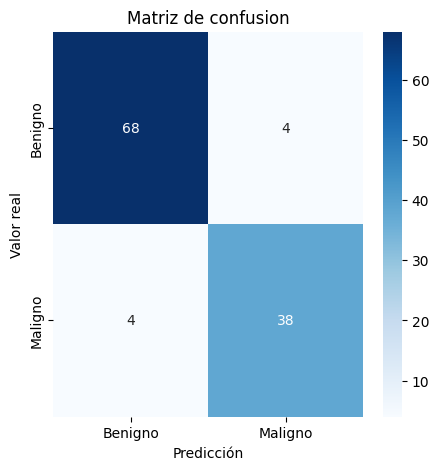


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [22]:
# Importamos los módulos necesarios para esta tarea
from sklearn.tree import DecisionTreeClassifier

# --------- Entrenamiento del modelo ---------
# Creamos el modelo
dt = DecisionTreeClassifier(random_state=42)

# K-fold con k=5
kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores5_dt = cross_val_score(dt, X_train, y_train, cv=kf5, scoring='accuracy')
f1_scores5_dt = cross_val_score(dt, X_train, y_train, cv=kf5, scoring='f1')

# K-fold con k=10
kf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc_scores10_dt = cross_val_score(dt, X_train, y_train, cv=kf10, scoring='accuracy')
f1_scores10_dt = cross_val_score(dt, X_train, y_train, cv=kf10, scoring='f1')

print("Resultados de validación cruzada:")
print(f"Accuracy medio con k=5: {np.mean(acc_scores5_dt):.4f} +/- {np.std(acc_scores5_dt):.4f}")
print(f"Accuracy medio con k=10: {np.mean(acc_scores10_dt):.4f} +/- {np.std(acc_scores10_dt):.4f}")
print(f"F1-Score medio con k=5: {np.mean(f1_scores5_dt):.4f} +/- {np.std(f1_scores5_dt):.4f}")
print(f"F1-Score medio con k=10: {np.mean(f1_scores10_dt):.4f} +/- {np.std(f1_scores10_dt):.4f}")
# Usamos ambas métricas por lo anteriormente dicho, que debido al desbalanceo de la clase target f1 nos da
# una mejor aproximación del rendimiento real del modelo

# --------- Entrenamiento final y evaluación ---------
# Entrenamos el modelo con todos los datos de entrenamiento
dt.fit(X_train, y_train)

# Predicción sobre el conjunto de test
y_pred_dt = dt.predict(X_test)

# --------- Métricas ---------
metricas(y_test, y_pred_dt)

Como ya comentamos, debido al desbalanceo de la clase target se ha usado también el f1-score como métrica princpal durante la validación cruzada. La diferencia entre la precisión y el f1-score, es que esta última tiene en cuenta el recall o sensibilidad. Mientras que la precisión dice "de los que predije como malignos ¿cuántos lo eran?" el f1 dice "de los malignos reales ¿cuántos detecté?" y esto nos sirve bien ya que hay muchos menos malignos que benignos.

Se ha realizado validación cruzada estratificada (por el desbalanceo en la clase target) con k=5 y k=10. Los resultados muestran una precisión media de 0.92 y un F1-score medio de 0.89, ambos con desviaciones estándar bajas, lo que indica que el modelo presenta un rendimiento estable y generalizable.

Luego, se reentrenó el modelo con el conjunto completo de entrenamiento y se evaluó sobre el conjunto de test, obteniendo una precisión de 0.93 y un F1-score de 0.90. La matriz de confusión nos muestra un número equilibrado de aciertos en ambas clases, reafirmando la hipótesis de que el modelo generaliza bien.

Finalmente decir que la validación cruzada permite estimar el rendimiento esperado de un modelo antes de su evaluación final y comprobar la estabilidad de sus resultados, mientras que la evaluación sobre el conjunto de test proporciona una medida más realista del desempeño final.



## **5. Regresión Logística con CV**

### **Entrenamiento y evaluación del modelo**

Realizaremos lo mismo que en el apartado anterior pero con el modelo de regresión logística para ver el impacto de la validación cruzada con distintos valores de K para este modelo.

Resultados de validación cruzada:
Accuracy medio con k=5: 0.9538 +/- 0.0128
Accuracy medio con k=10: 0.9516 +/- 0.0255
F1-Score medio con k=5: 0.9367 +/- 0.0180
F1-Score medio con k=10: 0.9332 +/- 0.0356

Evaluación en el conjunto de test:
Accuracy: 0.9386
F1-Score final: 0.9114



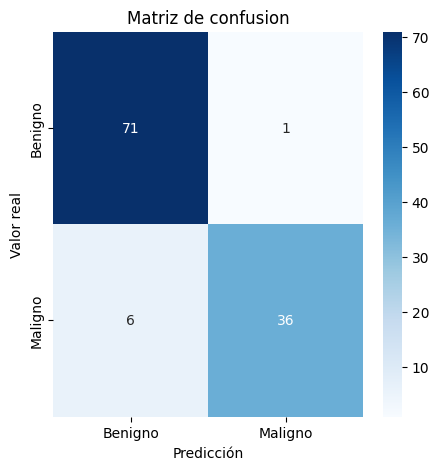


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [23]:
# Importamos los módulos necesarios para esta tarea
from sklearn.linear_model import LogisticRegression

# --------- Entrenamiento del modelo ---------
# Creamos el modelo
lr = LogisticRegression(random_state=42, max_iter=3400, solver='lbfgs')
# Le pongo 3400 iteraciones porque son las minimas para que converja el modelo

# K-fold con k=5
kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores5_lr = cross_val_score(lr, X_train, y_train, cv=kf5, scoring='accuracy')
f1_scores5_lr = cross_val_score(lr, X_train, y_train, cv=kf5, scoring='f1')

# K-fold con k=10
kf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc_scores10_lr = cross_val_score(lr, X_train, y_train, cv=kf10, scoring='accuracy')
f1_scores10_lr = cross_val_score(lr, X_train, y_train, cv=kf10, scoring='f1')

print("Resultados de validación cruzada:")
print(f"Accuracy medio con k=5: {np.mean(acc_scores5_lr):.4f} +/- {np.std(acc_scores5_lr):.4f}")
print(f"Accuracy medio con k=10: {np.mean(acc_scores10_lr):.4f} +/- {np.std(acc_scores10_lr):.4f}")
print(f"F1-Score medio con k=5: {np.mean(f1_scores5_lr):.4f} +/- {np.std(f1_scores5_lr):.4f}")
print(f"F1-Score medio con k=10: {np.mean(f1_scores10_lr):.4f} +/- {np.std(f1_scores10_lr):.4f}")
# Usamos ambas métricas por lo anteriormente dicho, que debido al desbalanceo de la clase target f1 nos da
# una mejor aproximación del rendimiento real del modelo

# --------- Entrenamiento final y evaluación ---------
# Entrenamos el modelo con todos los datos de entrenamiento
lr.fit(X_train, y_train)

# Predicción sobre el conjunto de test
y_pred_lr = lr.predict(X_test)

# --------- Métricas ---------
metricas(y_test, y_pred_lr)

Con la regregresión logística vemos que obtenemos valores similares aunque mejores que con los árboles de decisión, aquí obtenemos con k=5 un *accuracy* de 0.95 y una *F1-score* de 0.93, con desviaciones típicas más bajas.

En cuanto a la matriz de confusión, acierta más a la hora de clasificar benignos pero falla un poco más a la hora de clasificar malignos. En concreto solo ha clasificado como maligno 1 benigno y 6 malignos clasificados como malignos.

Podemos concluir que este modelo tiene mejores números sobre el papel, pero no es tan equilibrado como el modelo de árboles de decisión ya que, sus números vinen de que clasifica mejor los tumores benignos, pero estos son los que también causan el desbalanco en la clase *diagnosis* (63%).


## **6. K-NN con CV**

### **Entrenamiento y evaluación del modelo**

Realizaremos lo mismo que en el apartado anterior pero con el modelo de regresión logística para ver el impacto de la validación cruzada con distintos valores de K para este modelo.

Resultados de validación cruzada:
Accuracy medio con k=5: 0.9341 +/- 0.0287
Accuracy medio con k=10: 0.9296 +/- 0.0354
F1-Score medio con k=5: 0.9092 +/- 0.0394
F1-Score medio con k=10: 0.9031 +/- 0.0525

Evaluación en el conjunto de test:
Accuracy: 0.9123
F1-Score final: 0.8684



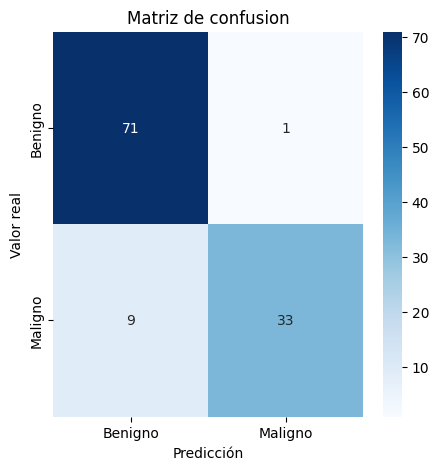


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



In [24]:
# Importamos los módulos necesarios para esta tarea
from sklearn.neighbors import KNeighborsClassifier

# --------- Entrenamiento del modelo ---------
# Creamos el modelo
knn = KNeighborsClassifier(n_neighbors=5) # Dejo el valor por defecto de vecinos

# K-fold con k=5
kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores5_knn = cross_val_score(knn, X_train, y_train, cv=kf5, scoring='accuracy')
f1_scores5_knn = cross_val_score(knn, X_train, y_train, cv=kf5, scoring='f1')

# K-fold con k=10
kf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc_scores10_knn = cross_val_score(knn, X_train, y_train, cv=kf10, scoring='accuracy')
f1_scores10_knn = cross_val_score(knn, X_train, y_train, cv=kf10, scoring='f1')

print("Resultados de validación cruzada:")
print(f"Accuracy medio con k=5: {np.mean(acc_scores5_knn):.4f} +/- {np.std(acc_scores5_knn):.4f}")
print(f"Accuracy medio con k=10: {np.mean(acc_scores10_knn):.4f} +/- {np.std(acc_scores10_knn):.4f}")
print(f"F1-Score medio con k=5: {np.mean(f1_scores5_knn):.4f} +/- {np.std(f1_scores5_knn):.4f}")
print(f"F1-Score medio con k=10: {np.mean(f1_scores10_knn):.4f} +/- {np.std(f1_scores10_knn):.4f}")
# Usamos ambas métricas por lo anteriormente dicho, que debido al desbalanceo de la clase target f1 nos da
# una mejor aproximación del rendimiento real del modelo

# --------- Entrenamiento final y evaluación ---------
# Entrenamos el modelo con todos los datos de entrenamiento
knn.fit(X_train, y_train)

# Predicción sobre el conjunto de test
y_pred_knn = knn.predict(X_test)

# --------- Métricas ---------
metricas(y_test, y_pred_knn)

Este modelo con valores de *accuracy* y *f1-score* mejores que árboles de decisión pero inferiores a la regresión logística, no es mejor que ninguno de los anteriores. Porque predice de igual manera los tumores benignos que la regresión pero falla en clasificar un maligno más haciendo un total de 7 falsos positivos.

## **7. Recopilación de los resultados obtenidos y conclusiones**
### &nbsp;&nbsp;&nbsp;**Árboles de decisión**
+ **K = 5:**

  - Accuracy medio: 0.9231 +/- 0.0326

  - F1-Score medio: 0.8962 +/- 0.0447

+ **K = 10:**

  - Accuracy medio: 0.9166 +/- 0.0389

  - F1-Score medio: 0.8866 +/- 0.0571

### &nbsp;&nbsp;&nbsp;**Regresión Logística**

+ **K = 5:**

  - Accuracy medio: 0.9538 +/- 0.0128

  - F1-Score medio: 0.9367 +/- 0.0180

+ **K = 10:**

  - Accuracy medio: 0.9516 +/- 0.0255

  - F1-Score medio: 0.9332 +/- 0.0356

### &nbsp;&nbsp;&nbsp;**K Vecinos más Cercanos (KNN)**

+ **K = 5:**

  - Accuracy medio: 0.9341 +/- 0.0287

  - F1-Score medio: 0.9092 +/- 0.0394

+ **K = 10:**

  - Accuracy medio: 0.9296 +/- 0.0354

  - F1-Score medio: 0.9031 +/- 0.0525

Como ya hemos comentado, viendo los números que aquí arriba tenemos de la validación cruzada de cada uno de los modelos, diríamos que a priori el que mejor funciona es la regresión ya que tiene los valores más altos con las desviaciones más bajas. Pero si tenemos en cuenta cómo predice el modelo basandonos en la matriz de confusión, creo que los árboles de decisión en este es un modelo más estable ya que hace una predicción más equilibrada del conjunto de test.

## **8. Influencia del valor k en la validación cruzada**

Al aumentar el número de particiones (k) en la validación cruzada, los valores medios de *accuracy* y *f1-score* disminuyen ligeramente en todos los modelos.

Esto puede deberse a que, con un mayour número de folds, el modelo evalúa sobre subconjuntos más pqueños y variados, obteniendo una estimación más conservadora pero también más fiable de su rendimiento.

Las diferencias entre k=5 y k=10 son reducidas, lo que indica que los modelos mantienen una buena estabilidad y generalización.